# Assigment, transient groundwater 2019

Submitted by: 

### Name:  Kumar Baral 
### Student number: 1057242 

Programmee: Water science and Engineering, Hydrology and Water resource

Module 3 
 
Transient Groundwater Flow 

Submitted to: 

Prof. Theo Olsthoorn

## Assignment

## Situation (a building pit next to a stright river)

A large construction is to be realized next to a river that is in direct contact with the aquifer next to it. The building pit measures 50x50 m and river side is at 400 m distance from the river shore.

Transmissivity and storage coefficient are given.

    kD = 900 m2/d
    S = 0.25 [-]

Two extraction wells are used at the corners of the building pit.

The drawdown everywhere in the building pit must be at least 5 m, to be reached within one month of pumping.

The pumping will continue after this month for 5 more months during which the drawdown is to be maintained. However the pumping can be reuced after the first month. Adjust the pumping once per month, such that at the end of each month the darwdown fullfils the requied 5 m.

After 6 months, pumping is stopped, so that the water levels can restore.

-----------------------------------------------------------------------------------------------------------------------------------------------

![Capture](Capture.JPG)       

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 # Theis well function
from scipy.special import erfc 
W=exp1

## a)  The flow $Q_r$ through a ring around the well with radius r

The flow $Q_r$ can be derived by differentiation with respect to $r$:

$$ Q_r = -kD (2 \pi r) \frac {\partial s} {\partial r} $$

$$ Q_r = kD \,\, 2 \pi r \,\, \frac {Q_0} {4 \pi kD} \frac {e^{-u}} u \frac {2 r S} {4 kD t} $$

note for the last factor that

$$ \frac {2 r S} {4 kD t} = \frac 2 r \frac {r^2 S} { 4 kD t} = \frac 2 r u$$

so that

$$ \frac {Q_r} {Q_0} = \frac {kD \,\, 2 \pi r} {4 \pi kD} \frac {e^{-u}} u \frac {2 u} r $$

And finally, we have

$$ Q_r = Q_0 \, e^{-u} $$

The flow strength at this ring with radius $r$ equals

$$q_r = \frac {Q_r} {2 \pi r} = \frac {Q_0} {2 \pi r} e^{-u}$$


The simplest way to envision the flow $Q_r$ is by setting

$$ \frac {Q_r} {Q_0} = e^{-u} $$



So, we can conclude that,  as  far as  we go from the well, the distance from the well will also be increased. Drawdowm will also be decreased exponentially. This virtue will better react with the recharge from river. So that, it is wise to install extraction well in the near corners of the building pit. 


#### Alternatively,  we can define by flow from river when its level is changing.
The river is located in the left side of the buiding pit. The distance is 400 m. Let us consider the ground water flow from the river to the right hand side is upto infinite length. 
Considering one-dimensional aquifer of infinity lateral extent, the partial differential equation can be written as 
$$ kD \frac { \partial^2 s} { \partial x^2} = S \frac { \partial s} { \partial t} $$
The solution of this equation will be 
$$ s(x,t) = A\,erfc (u), u = \sqrt \frac{x^2 S}{4kDt} $$

The part of building pit near to the river is considered as the critical point in terms of ground water. Lets check by the plot of drawdown at that part i.e 400 m from the river. We can plot graphs for other locations also. For instance  0 to 100 m from the river etc. 

So lets define the parameters 

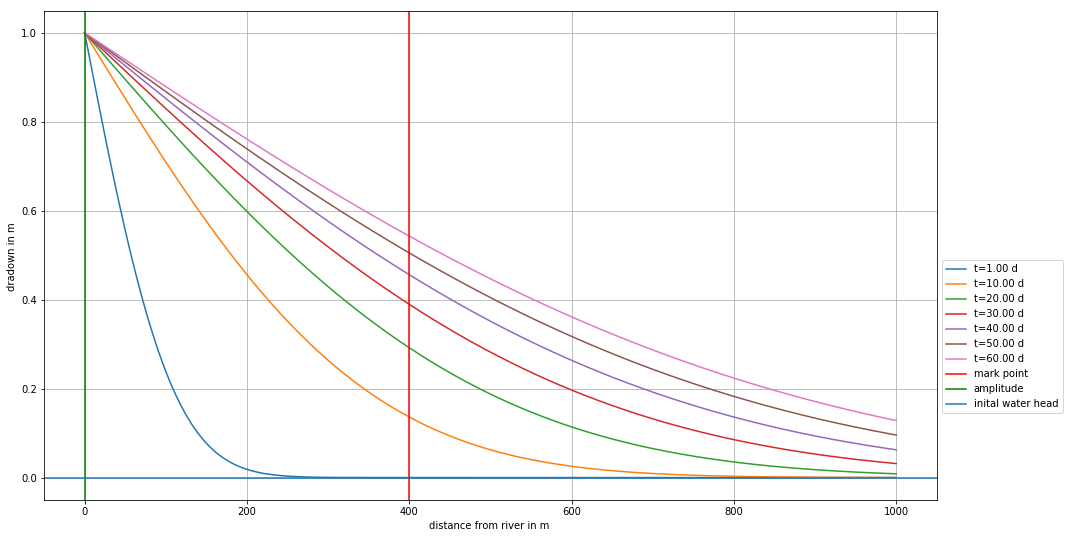

In [44]:
kD= 900 # m2/day
A=+1.0 # m lets assume now.
S= 0.25 # [-]
plt.figure(figsize=[16,9])
x=np.linspace(0,1000,451) # m from the river 
y=np.zeros_like(x)
time=[1,10,20,30,40, 50,60] # days
for t in time:
    u=np.sqrt( x**2*S/(4*kD*t))
    s= A*erfc(u)
    plt.plot(x,s,label='t={:.2f} d'.format(t))
plt.axvline(x=400, color='r', label='mark point')
plt.axvline(x=A, color='g', label='amplitude')
plt.axhline(y=0,xmin=0, xmax= A,  label='inital water head')    
plt.grid()    
plt.xlabel('distance from river in m ')
plt.ylabel( 'dradown in m ')
plt.legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()

For any positive change in water level in the river, water head is always higher at 400 m from the river side than 450 m from the river in any day. so its better to install the pump in the location in the near corners. 

In a simple way, well should be located at the near corners from the river for the reduction of the effect of the inflow from the river to ground water system. 

But for the negative value of amplitude, the well location should be shifted to another location. At that condition the critical points assumed should be relocated.


## b) To find critical points: Lets define assumed extraction rate and anylize the drawdown pattern at random points of building pit.


#### Lets find drawdown at  y= 0, y= 25 m and y = 50 m and lets assume random extraction rate of 4500 m3/day

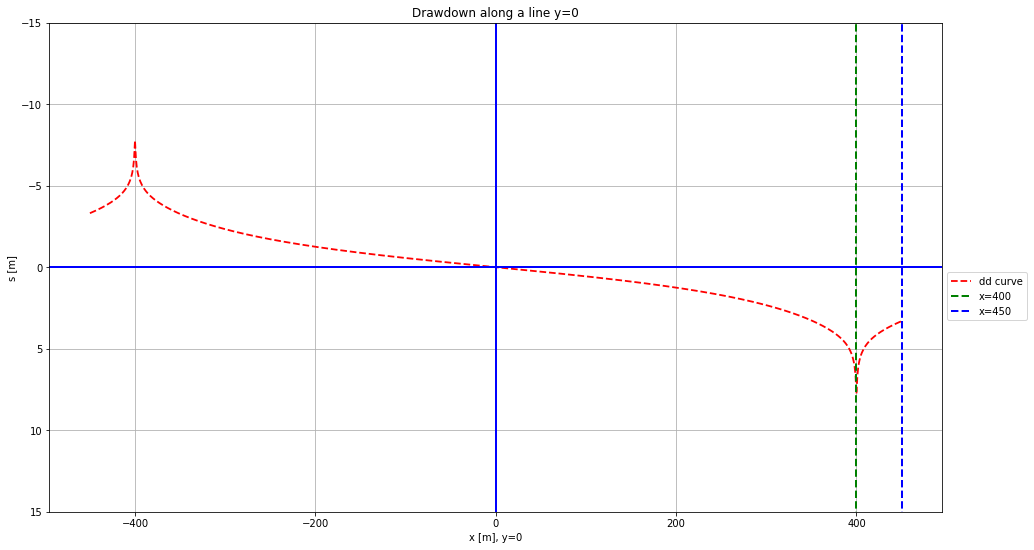

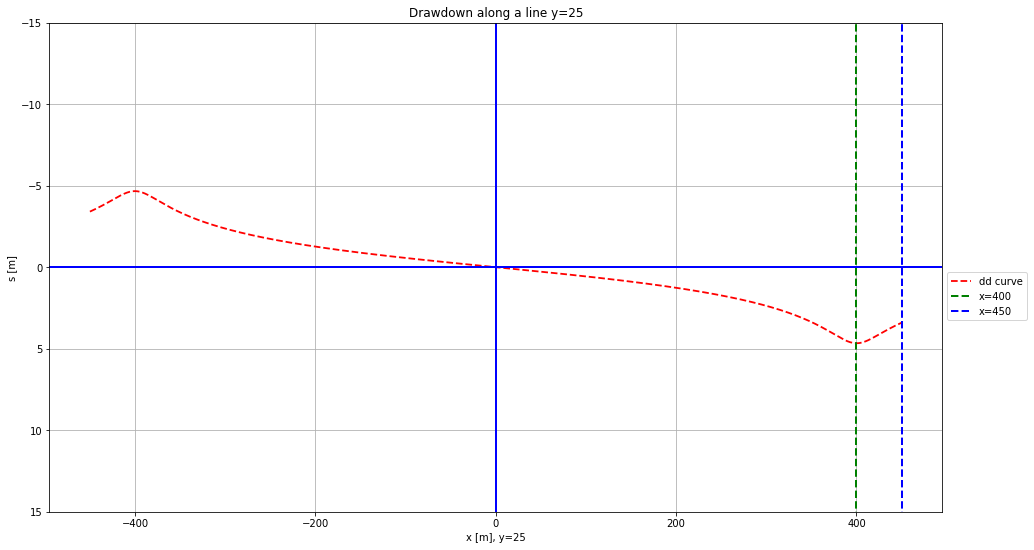

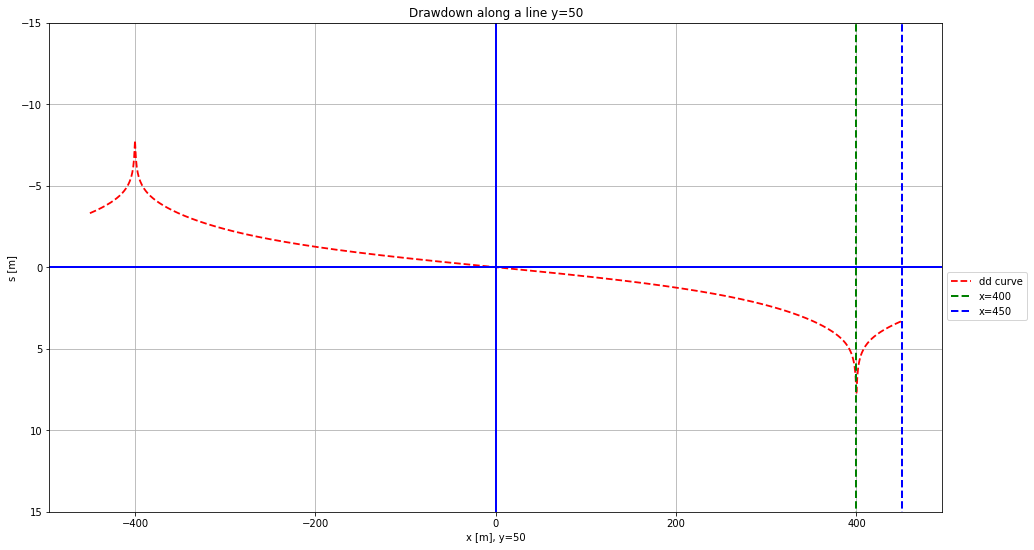

In [47]:
x0 = 400 # m # distance from river
Q = 4500 # m3/d, extraction of te real well
r0 = 0.25 # well radius
t = 30.0 # d
a = 50 # m side of squared construction pit
rw = 0.25 # well radius (radius of borehole)

# locations of well, mirror well an observation points
x1, y1 = x0, 0  # location of extraction well1
x2, y2 =  x0, a  # location of extraction well2
x3, y3 = -x0, 0  # location of mirror well1
x4, y4 = -x0, a  # location of mirror well2
x, y    = np.linspace(-x0-a, x0+a, 901) , np.zeros_like(x) # observation points



ra1 = np.sqrt((x1 - x)**2 + (y1 - y)**2)
ra2 = np.sqrt((x2 - x)**2 + (y2 - y)**2)
ra3 = np.sqrt((x3 - x)**2 + (y3 - y)**2)
ra4 = np.sqrt((x4 - x)**2 + (y4 - y)**2) 

# Use logical indexing to set only a limited number of points
# Logical indexing gives as many values as the array that are 
# True of correct and False otherwise. Only the True values will be set.
ra1[ra1<rw] = rw
ra2[ra2<rw] = rw
ra3[ra3<rw] = rw
ra4[ra4<rw] = rw

ua1 = ra1**2 * S / (4 * kD * t)
ua2 = ra2**2 * S / (4 * kD * t)
ua3 = ra3**2 * S / (4 * kD * t)
ua4 = ra4**2 * S / (4 * kD * t)

s = Q / (4 * np.pi *kD) * (W(ua1) + W(ua2)-W(ua3)-W(ua4))

plt.figure(figsize=[16,9])
plt.title('Drawdown along a line y=0')
plt.xlabel('x [m], y=0')
plt.ylabel('s [m]')
plt.grid()
plt.plot(x, s, linestyle='--', linewidth=1.8, color='r', label='dd curve')
plt.ylim(15, -15) # invert the direction of the y-axis
plt.axvline(x=0, ymin=-2,  ymax = 2.0, color='b', linewidth=2)
plt.axhline(y=0, xmin=-2,  xmax = 2.0, color='b', linewidth=2)
plt.axvline(x=400, ymin=-2,  ymax = 2.0, color='g', linewidth=2, linestyle='--', label='x=400')
plt.axvline(x=450, ymin=-2,  ymax = 2.0, color='b', linewidth=2, linestyle='--', label='x=450')
plt.legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()
#--------------------------------------------------------------------------------------------------------------------------------------------

x, y    = np.linspace(-x0-a, x0+a, 901) , np.zeros_like(x)+(a/2) # observation points
#y  =np.linspace(-25,25,201)

rw = 0.25 # well radius (radius of borehole)

ra1 = np.sqrt((x1 - x)**2 + (y1 - y)**2)
ra2 = np.sqrt((x2 - x)**2 + (y2 - y)**2)
ra3 = np.sqrt((x3 - x)**2 + (y3 - y)**2)
ra4 = np.sqrt((x4 - x)**2 + (y4 - y)**2) 
#print(r1,r2)
# Use logical indexing to set only a limited number of points
# Logical indexing gives as many values as the array that are 
# True of correct and False otherwise. Only the True values will be set.
ra1[ra1<rw] = rw
ra2[ra2<rw] = rw
ra3[ra3<rw] = rw
ra4[ra4<rw] = rw

ua1 = ra1**2 * S / (4 * kD * t)
ua2 = ra2**2 * S / (4 * kD * t)
ua3 = ra3**2 * S / (4 * kD * t)
ua4 = ra4**2 * S / (4 * kD * t)

s = Q / (4 * np.pi *kD) * (W(ua1) + W(ua2)-W(ua3)-W(ua4))

plt.figure(figsize=[16,9])
plt.title('Drawdown along a line y=25')
plt.xlabel('x [m], y=25')
plt.ylabel('s [m]')
plt.grid()
plt.plot(x, s, linestyle='--', linewidth=1.8, color='r', label='dd curve')
plt.ylim(15, -15) # invert the direction of the y-axis
plt.axvline(x=0, ymin=-2,  ymax = 2.0, color='b', linewidth=2)
plt.axhline(y=0, xmin=-2,  xmax = 2.0, color='b', linewidth=2)
plt.axvline(x=400, ymin=-2,  ymax = 2.0, color='g', linewidth=2, linestyle='--', label='x=400')
plt.axvline(x=450, ymin=-2,  ymax = 2.0, color='b', linewidth=2, linestyle='--', label='x=450')
plt.legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()
#---------------------------------------------------------------------------------------------------------------------------------------
x, y    = np.linspace(-x0-a, x0+a, 901) , np.zeros_like(x)+a # observation points
#y  =np.linspace(-25,25,201)

rw = 0.25 # well radius (radius of borehole)

ra1 = np.sqrt((x1 - x)**2 + (y1 - y)**2)
ra2 = np.sqrt((x2 - x)**2 + (y2 - y)**2)
ra3 = np.sqrt((x3 - x)**2 + (y3 - y)**2)
ra4 = np.sqrt((x4 - x)**2 + (y4 - y)**2) 
#print(r1,r2)
# Use logical indexing to set only a limited number of points
# Logical indexing gives as many values as the array that are 
# True of correct and False otherwise. Only the True values will be set.
ra1[ra1<rw] = rw
ra2[ra2<rw] = rw
ra3[ra3<rw] = rw
ra4[ra4<rw] = rw

ua1 = ra1**2 * S / (4 * kD * t)
ua2 = ra2**2 * S / (4 * kD * t)
ua3 = ra3**2 * S / (4 * kD * t)
ua4 = ra4**2 * S / (4 * kD * t)

s = Q / (4 * np.pi *kD) * (W(ua1) + W(ua2)-W(ua3)-W(ua4))

plt.figure(figsize=[16,9])
plt.title('Drawdown along a line y=50')
plt.xlabel('x [m], y=50')
plt.ylabel('s [m]')
plt.grid()
plt.plot(x, s, linestyle='--', linewidth=1.8, color='r', label='dd curve')
plt.ylim(15, -15) # invert the direction of the y-axis
plt.axvline(x=0, ymin=-2,  ymax = 2.0, color='b', linewidth=2)
plt.axhline(y=0, xmin=-2,  xmax = 2.0, color='b', linewidth=2)
plt.axvline(x=400, ymin=-2,  ymax = 2.0, color='g', linewidth=2, linestyle='--', label='x=400')
plt.axvline(x=450, ymin=-2,  ymax = 2.0, color='b', linewidth=2, linestyle='--', label='x=450')
plt.legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Conclusion: There is always minimum drawdown at x=450 and at y=0 and y= 50, the drawdown are minimum always. So we can define two remainings corners as critical points. Mathematically also, drawdown is exponentially decreasing with the distance from the well. corner distance will be always the longest distance. So that also it is obvious that two remaining points can be defined as the critical points.

 ### To calculate extraction rate to maintain drawdown of minimun 5 m, lets say ( 5.30 m ) at the critical  points.

In [65]:
kD= 900  #[m2/d] is Transmissivity
S= 0.25  # [-] is Storativityx0 = 400 # m # distance from river
x0 = 400 # m # distance from river
a = 50 # m side of squared construction pit
rw = 0.25 # well radius (radius of borehole)
s=5.30   # [m] required drawdown

# locations of well, mirror well an observation points
x1, y1 = x0, 0  # location of extraction well1
x2, y2 =  x0, a  # location of extraction well2
x3, y3 = -x0, 0  # location of mirror well1
x4, y4 = -x0, a  # location of mirror well2
x, y    = x0+a,0  # location of critical point/observation point

# To use theory of  Superposition lets find distance from well to observation points/critical points,

d1 = a                             #distance from  extration well 1
d2 = np.sqrt(2*a**2)               #distance from extration well 2
d3 = 2*x0+a                        #distance from injection well corresponding to well 1
d4 = np.sqrt ((2*x0+a)**2+ a**2)   #distance from injection well corresponding to well 2

Qex =[]
time = []
dd = []
day = [30,60,90,120,150,180] # days
for t in day:
    
    u1 = d1 ** 2 * S / (4 * kD * t) 
    u2 = d2 ** 2 * S / (4 * kD * t)
    u3 =d3 ** 2 * S / (4 * kD * t)
    u4 = d4 ** 2 * S / (4 * kD * t)
    
    QD1 = s*(4 * np.pi * kD) / (W(u1) + W(u2)- W(u3)- W(u4))
                    
    sd =(QD1/(4 * np.pi * kD)) * (W(u1) + W(u2)- W(u3)- W(u4))
    s = sd
    t = t 
    Qex.append(QD1)
    time.append(t)
    dd.append(s)
Qx= np.append(Qex,[0])
print ('Q=', Qx)
print ('drawdown=',dd)
print('t=', time)


Q= [7205.12738283 6465.45830317 6198.40566888 6060.84409676 5977.00639956
 5920.57241853    0.        ]
drawdown= [5.3, 5.3, 5.3, 5.3, 5.3, 5.3]
t= [30, 60, 90, 120, 150, 180]


 ## c) Extraction as a function of time

Drawdown of the well is given by
$$ s(x,t) = \frac{Q}{4 \pi kD}\,W \left(\sqrt \frac{x^2 S}{4kDt}\right) $$

Rearranging we get, discharge ($Q$)
$$ Q  = \frac {4 \pi kD s(x,t)}{W \left(\sqrt \frac{x^2 S}{4kDt}\right)} $$

Aslo $W(u)$ can be expressed as


$$ W(u) \approx ln \left( \frac {2.25 kD}{r^2 S}\right) + ln(t) $$

for different values of r,  first term is only different,  but $\mathtt ln(t)$ is same. That means the extraction lines are parallel, which clearly shows that extraction is function of time viz:  $Q = f (t) $ . For constant value of $r$ ( at specific location), $Q$ will be changed only if we change $t$.









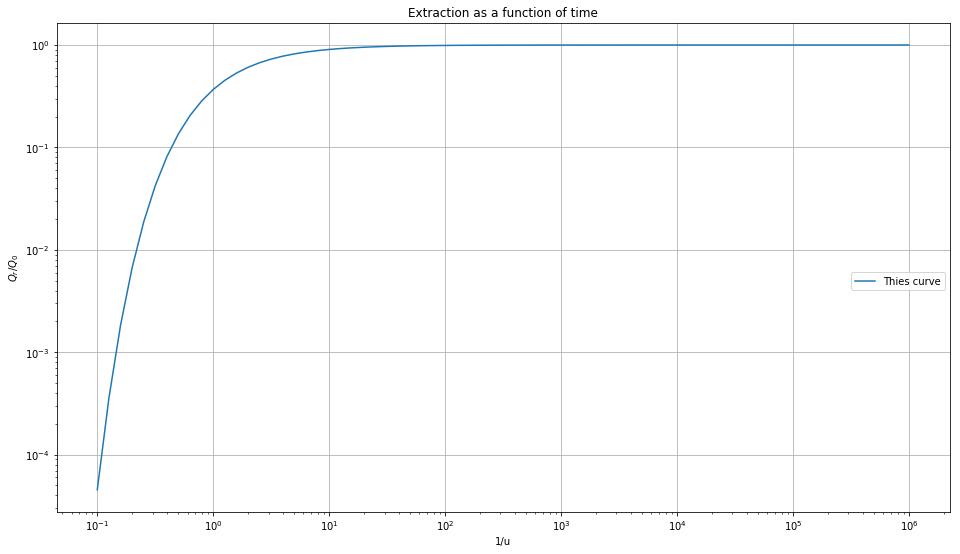

In [51]:
u = np.logspace(-6, 1, 71)

plt.figure(figsize=[16,9])
plt.plot(1/u, np.exp(-u), label='Thies curve')

plt.title("Extraction as a function of time")
plt.xlabel('1/u')
plt.ylabel('$Q_r / Q_0$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()

As, $1/u$ is proportional to time. So this type curve is a scaled graph of $Q_r/Q_0$ with time. It shows that initially the flow through a ring at distance $r$ is zero and that it finally approaches $Q_0$ itself. This is, the water, which all comes from storage, is coming from ever increasing distances, for the difference between $Q_0 - Q_r$ is the amount released form storage between $r=0$ and $r=r$ at a given time, will deminish with time, implying that the water is realsed from storage at an ever greater distance from the well.
 

#### Applying Principle of superposition in time  for monthly adjustement in the extraction rate ( Again Extraction as a function of time) 

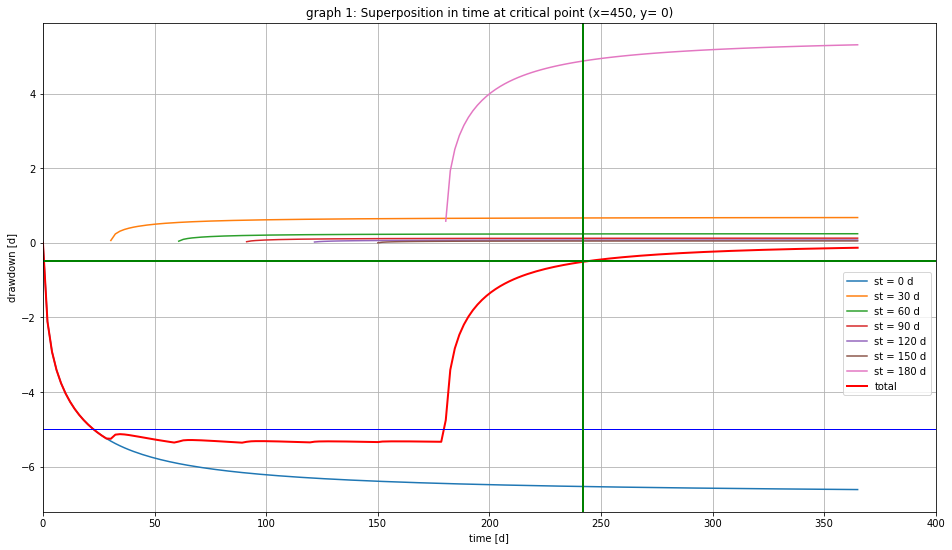

In [73]:
kD= 900     # [m2/d] is Transmissivity 
S= 0.25    #  [-] is Storativity
Qz=Qx
times = np.linspace(0.0001, 365, 181) # from 0 to 180, 181 points (1 d interval)
swt = [0, 30,  60, 90, 120 , 150, 180] # days

# changes of flow. hstack((a, b)) glues two arrays or a value and array together
dQ = np.hstack( (Qz[0], np.diff(Qz)) )

#xw, yw, x0, y0 = 100, 50, 0.5, -3
r = 50
r1=70.71
r2=850
r3=851.71

plt.figure(figsize=[16,9])
plt.title('graph 1: Superposition in time at critical point (x=450, y= 0)')
plt.xlabel('time [d]')
plt.ylabel('drawdown [d]')
plt.xlim((0, 400))
plt.grid()
s = np.zeros_like(times)  # array of zeros same shape as the array of times
for st, Q in zip(swt, dQ):
    I = times >= st  # logical array I telling which times are greater than switch time st
    #print(I)
    u=(r**2 * S /(4 * kD * (times[I] - st)))
    u1=(r1**2 * S /(4 * kD * (times[I] - st)))
    u2=(r2**2 * S /(4 * kD * (times[I] - st)))
    u3=(r3**2 * S /(4 * kD * (times[I] - st)))
    
    ds = -Q/(4 * np.pi * kD) * ((W(u)+W(u1)-W(u2)-W(u3))) # negative sign for drawdown indication
    plt.plot(times[I], ds, label='st = {:.0f} d'.format(st))
    s[I] += ds
plt.plot(times, s, 'r', lw=2, label='total')
plt.plot(t,np.zeros_like(t))
plt.axhline(y=-0.5, xmin=0, xmax=400, linewidth=2, color='g')
plt.axhline(y=-5.0, xmin=0, xmax=400, linewidth=1, color='b')
plt.axvline(x=242, ymin=-7, ymax = 5.0, linewidth=2, color='g')

plt.legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()



## d) How much time is required after stopping until about 90% of the drawdown has disappeared?

 #### It takes about 245-180=50 days to recover the 90% of drawdown.

### Lets show drawdown and extraction rate at the same graph

In [2]:
#Plotting s and Q vs t in same graph
a = np.zeros_like(times)  # initially zero
for aa, te in zip(Qz, swt):
    a[times>=te] = aa

fig, ax = plt.subplots()
color = 'tab:blue'
ax.set_xlabel('time (days)')
ax.set_ylabel('drawdown', color=color)
ax.plot(times, s, linewidth=3, label='total drawdown',color=color)
plt.legend(loc='best',bbox_to_anchor=(1.5, 0.9))
ax.tick_params(axis='y', labelcolor=color)

ay = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ay.set_ylabel('Extraction rate', color=color)  # we already handled the x-label with ax1
ay.plot(times, a, 'k', label='Extration rate', color=color)
ay.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.legend(loc='best',bbox_to_anchor=(1.5, 0.8))
plt.show()

NameError: name 'np' is not defined

## d) Compute as a function of time the flow from the river into the groundwater system. It is assumed that the groundwater head is initially uniform and equal to the river stage (water level in the river). Do this for the average flow during the 6 month of building pit operation (ignore the variation in the extraction for simplicity).

### flow from the river

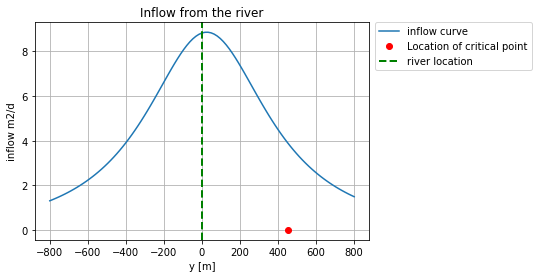

Total inflow with Q=5948 at t=180.000 d within y=-800 m to 800 m  equals 7508.1 m3/d


In [33]:
Q1=6797.28
Q2=6099.48
Q3=5847.55
Q4=5717.77
Q5=5638.68
Q6=5585.44
Q= (Q1+Q2+Q3+Q4+Q5+Q6)/6

x0 = 400 # m # distance from river
a=50
# locations of well, mirror well an observation points
x1, y1 = 400, 0  # location of extraction well1
x2, y2 =  400, 50  # location of extraction well2
x3, y3 = -400, 0  # location of mirror well1
x4, y4 = -400, 50  # location of mirror well2
#location of critical point/observation point
t=180 # days ( 6 months of operation)
y = np.linspace(-800, 800, 101)
x = np.zeros_like(y)

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)
r3 = np.sqrt((x - x3) ** 2 + (y - y3) ** 2)
r4 = np.sqrt((x - x4) ** 2 + (y - y4) ** 2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)
u3 = r3 ** 2 * S / (4 * kD * t)
u4 = r4 ** 2 * S / (4 * kD * t)

q1 = +Q / (2 * np.pi * r1) * np.exp(-u1)
q2 = +Q / (2 * np.pi * r2) * np.exp(-u2)
q3 = -Q / (2 * np.pi * r3) * np.exp(-u3)
q4 = -Q / (2 * np.pi * r4) * np.exp(-u4)

alpha1 = np.arctan2((y-y1), (x - x1))
alpha2 = np.arctan2((y-y2), (x - x2))
alpha3 = np.arctan2((y-y3), (x - x3))
alpha4 = np.arctan2((y-y4), (x - x4))

qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)+ q3 * np.cos(alpha3)+ q4 * np.cos(alpha4)
qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2)+ q3 * np.sin(alpha3)+ q4 * np.sin(alpha4)

qin = qx

plt.title('Inflow from the river')
plt.xlabel('y [m]')
plt.ylabel('inflow m2/d')
plt.grid()
plt.plot(y, -qin, label='inflow curve')
plt.plot(450,0,'ro', label="Location of critical point") #critical point

plt.axvline(x=0, linewidth=2, color='g', label='river location',linestyle='--')
plt.legend(loc='center right',bbox_to_anchor=(1.5, 0.89))
plt.show()
# to find the inflow for a given range of river from -800m  to 800 m. 
dy = -y[1:] + y[:-1]
qm = 0.5 * (qin[:-1] + qin[1:])
Qin = np.sum(qm * dy)
print('Total inflow with Q={:.0f} at t={:.3f} d within y=-800 m to 800 m  equals {:.1f} m3/d'\
     .format(Q, t, Qin))

## E) After exactly 3 months, the water level in the river rises suddenly by 1 m and stays so during one month, after which it suddenly returns to its original level.

## To what extent does this wave affect the water level in the building pit if no measure is taken?
## What must be the extraction during this month to guarantee that the building pit fulfills the required 5 m drawdown relative to the original water level? If both effects do not overlap, say so, and explain what you could to as building-pit owner to better counteract the effect of the wave  in the river stage on the head below the building pit

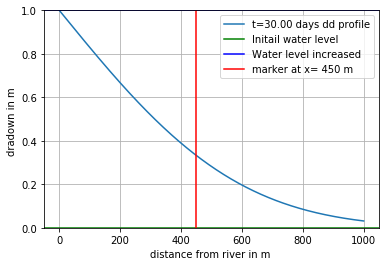

Because of sudden level rise of  1.0 m in the river, there will be 0.33 m level rise at critical point (x =450 m, y=0).


In [34]:
kD= 900 # m2/day
A=1.0 # m lets assume now.
S= 0.25 # [-]

x=np.linspace(0,1000,451) # m from the river 

t=30 # days. FOr 30 days the drawdown will be the highest. so t less than 30 is not taken. 
u=np.sqrt( x**2*S/(4*kD*t))
s= A*erfc(u)
plt.plot(x,s,label='t={:.2f} days dd profile'.format(t))
plt.axhline(y=0,xmin=0, xmax=1000, color='g', label='Initail water level')  
plt.axhline(y=1,xmin=0, xmax=1000, color='b', label='Water level increased')  
plt.axvline(x=450,ymin=0, ymax=1, color='r', label='marker at x= 450 m')    
plt.grid()    
plt.xlabel('distance from river in m ')
plt.ylabel( 'dradown in m ')
plt.ylim(0,1,0.01)
plt.legend(loc='best')
plt.show()
x=450
t=30 # days
u=np.sqrt( x**2*S/(4*kD*t))
s= round((A*erfc(u)),2)
print('Because of sudden level rise of ', A, 'm in the river, there will be', s, 'm level rise at critical point (x =450 m, y=0).')  


So, for the third month we have to set extraction rate so as to draw  5.0 m + 0.33 m generated by tide of the river. So, we have to draw 5.33 m of water during 3rd months ( 60-90 days). 

### lets calculate the extraction rate

In [35]:
snew=0.33 # m 
x0 = 400 # m # distance from river
r0 = 0.25 # well radius
t = 30.0 # d
a = 50 # m side of squared construction pit
rw = 0.25 # well radius (radius of borehole)

# locations of well, mirror well an observation points
x1, y1 = x0, 0  # location of extraction well1
x2, y2 =  x0, a  # location of extraction well2
x3, y3 = -x0, 0  # location of mirror well1
x4, y4 = -x0, a  # location of mirror well2
x, y    = 450, 0 # observation points



ra1 = np.sqrt((x1 - x)**2 + (y1 - y)**2)
ra2 = np.sqrt((x2 - x)**2 + (y2 - y)**2)
ra3 = np.sqrt((x3 - x)**2 + (y3 - y)**2)
ra4 = np.sqrt((x4 - x)**2 + (y4 - y)**2) 


ua1 = ra1**2 * S / (4 * kD * t)
ua2 = ra2**2 * S / (4 * kD * t)
ua3 = ra3**2 * S / (4 * kD * t)
ua4 = ra4**2 * S / (4 * kD * t)

Qnew = round(((snew * 4 * np.pi *kD) / (W(ua1) + W(ua2)-W(ua3)-W(ua4))),2)

print('Increase in extraction rate is Qin=', Qnew, 'm3/day more than previous (Q3=', Q3,') \
used extraction rate during 3rd month, i.e, Q3+ Qnew= ', Q3+Qnew, 'm3/day.' )

Increase in extraction rate is Qin= 448.62 m3/day more than previous (Q3= 5847.55 ) used extraction rate during 3rd month, i.e, Q3+ Qnew=  6296.17 m3/day.


#### Increase in extraction rate is Qin= 448.62 m3/day more than previous (Q3= 5847.55 )used extraction rate during 3rd month, i.e, Q3+ Qnew=  6296.17 m3/day.
#### To adjust the value of extraction for further months, we can simply repeat the procedure as above performed in section C. 
--------------------------------------------------------------------------------------------------------------------------------------------

## E ) If the river is influenced by sea tide, such that its level fluctuates twice a day between +1 and -1 m relative to the average value. How does this tide influence the required pumping? Is the location of the most critical point still the same?

## How much is the delay between the tide in the river and the fluctuation at the critical point in the building pit?

### Superposition in time

Any varying head can be approximated using a series of constant heads over short time intervals. This allows to use de 1D solution for a sudden head change to simulate the effect on an aquifer of a varying river head. It is assumed that the aquifer is in direct good contact with the surface water at $x=0$.

The superpostion may be written as

$$ s(x, t) = \sum _{i=1} ^{N} \left\{ A_i \mathtt{erfc} 
\sqrt{\frac {x^2 S} {4 kD (t - t_i)}} \right\}, \,\,\, t \ge t_i $$

Clearly, $a$ term $i$ is non-existent when $t < t_i$.

This formula can be computed by looping over the amplituces and times pertaining to each moment on which the amplitude changes.

With a series of amplitudues A, what matters is the change of amplitude. So we need

$$ A = A_0, A_1 - A_0, A_2 - A_1, ... A_n - A_{n-1} $$

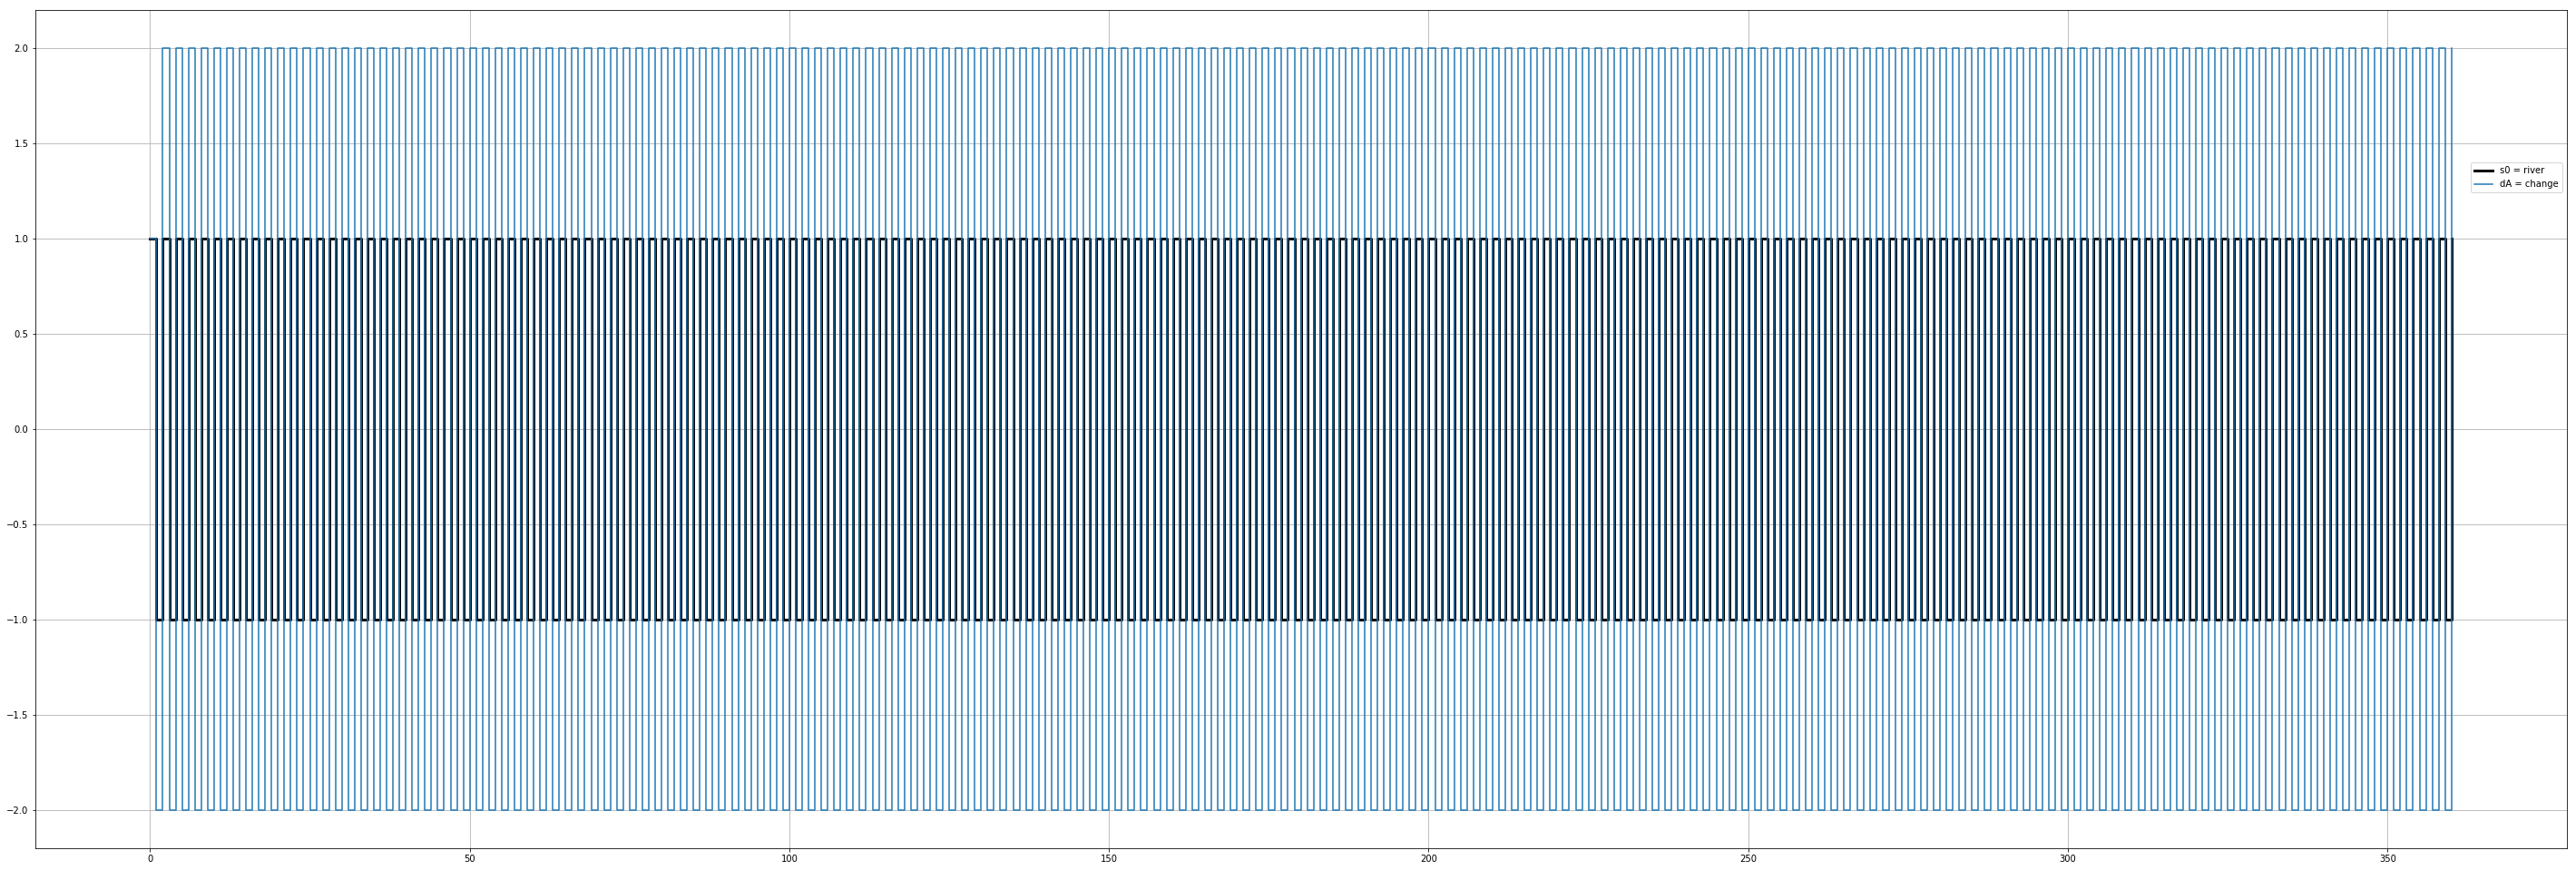

In [36]:
kD = 900 # m2/d
S = 0.25 # [-]
i=-1
s0 =[]   # to define amplitude of the river level change
days = np.linspace(0,360,361)
for t in days:
    A1=i**t
    s0.append(A1)
swt   = np.arange(len(s0)) # switch times
A     = np.hstack((s0[0], np.diff(s0)))

plt.figure(figsize=[50,17])
plt.step(swt, s0, 'k', label="s0 = river", lw=3, where='post')
plt.step(swt, A, label='dA = change', where='post')
plt.grid()
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()

## lets check what will happen at critical point ( x=450 ) and mid of the building pit ( x=425 m) as well as x= 400 m  because of changing level of river because of sea tide.

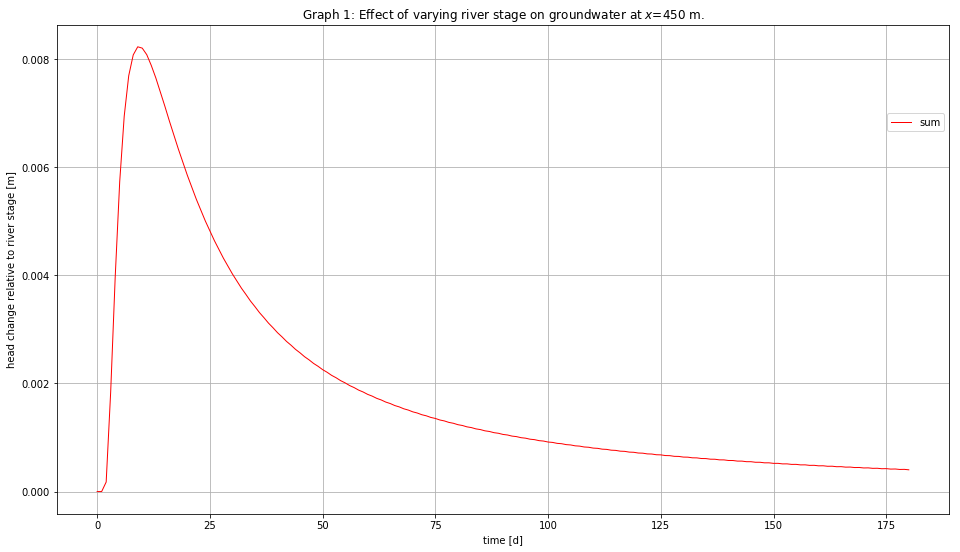

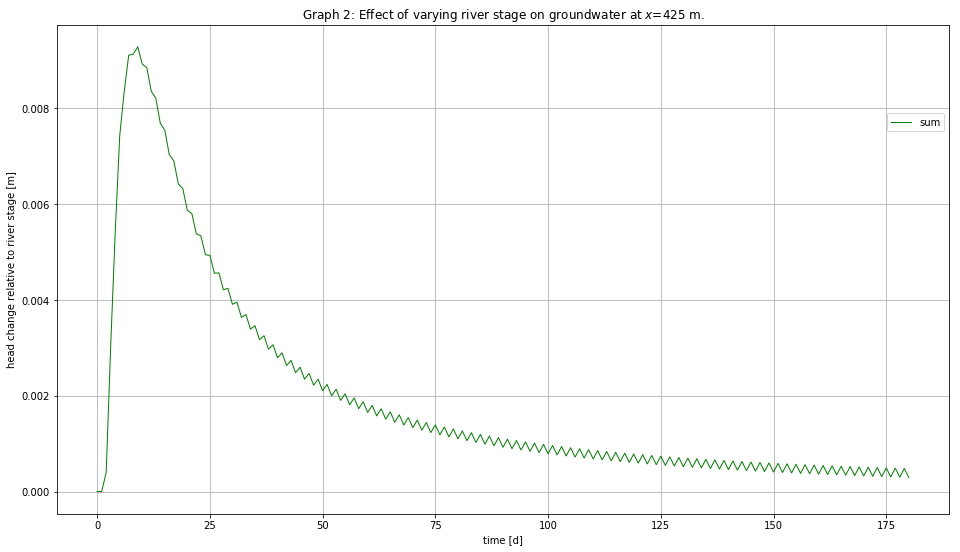

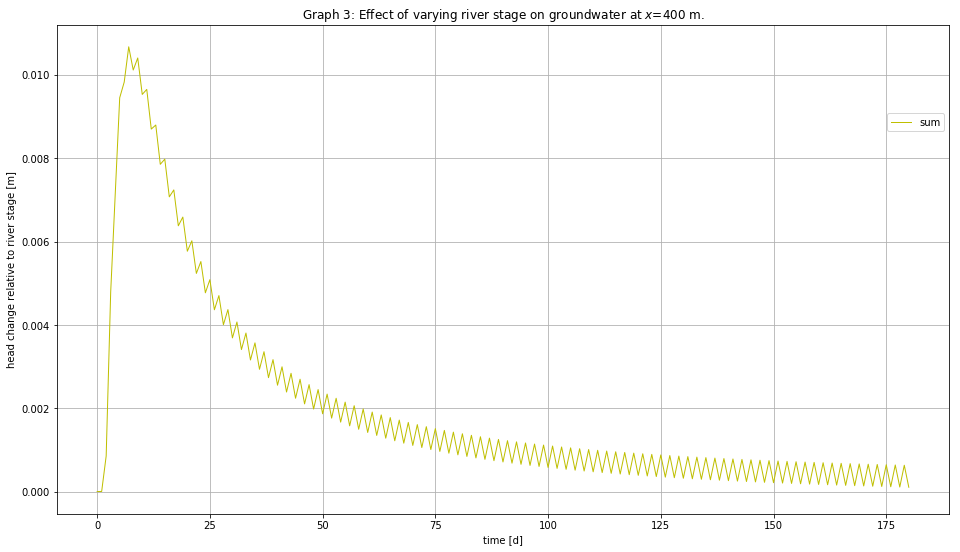

In [37]:
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Graph 1: Effect of varying river stage on groundwater at $x$={:.0f} m.".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()
#-------------------------------------------------------------------------------------------------------------------------#

x = 425 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Graph 2: Effect of varying river stage on groundwater at $x$={:.0f} m.".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'g-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()

#--------------------------------------------------------------------------------------------------------------------------#
x = 400 # m choose a value for x
t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Graph 3: Effect of varying river stage on groundwater at $x$={:.0f} m.".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'y-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()


### Conclusion: It is clearly seen that, change in water level will effect more at x=400 m which is the location of extraction well. But, in the critical point the effect of the tide is not as much as x= 400 m. With respect to this reason,  we can say that location of extraction well is  perfect. 


-------------------------------------------------------------------------------------------------------------------------------------

### How much is the delay between the tide in the river and the fluctuation at the critical point in the building pit?

### Lets have a look on the Graph 1 by zooming it in. 

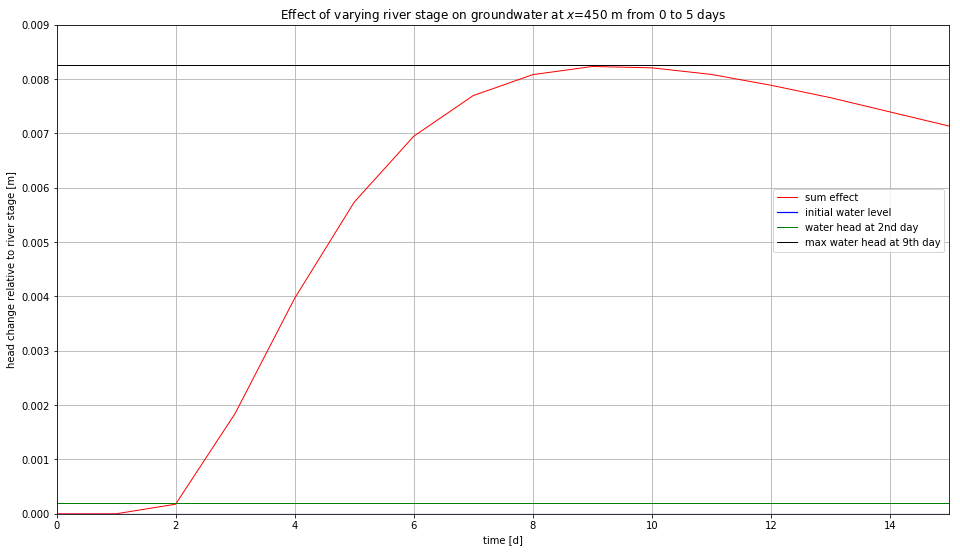

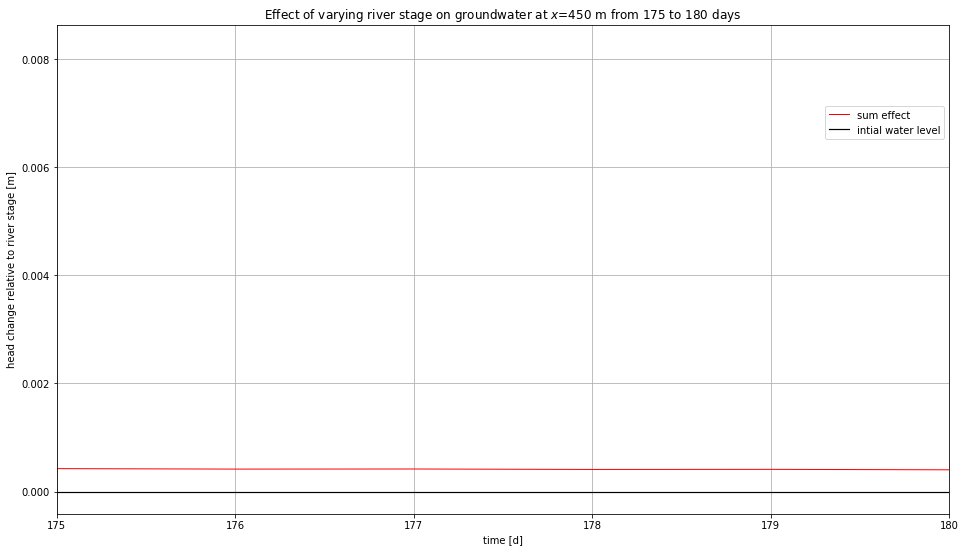

In [38]:
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f} m from 0 to 5 days".format(x))
plt.xlabel('time [d]')
plt.xlim(0,15)
plt.ylim(0,0.009)
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum effect', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')

plt.axhline(y=0.0000, linewidth=1.2, color='b', label='initial water level')
plt.axhline(y=0.0002, linewidth=1, color='g',label='water head at 2nd day')
plt.axhline(y=0.00825, linewidth=1, color='k',label='max water head at 9th day')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.6))

plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------#
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f} m from 175 to 180 days".format(x))
plt.xlabel('time [d]')
plt.xlim(175,180)
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum effect', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')

plt.axhline(y=0.0000, linewidth=1.2, color='k', label='intial water level')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()


#### Conclusion:  Tidal influence  can be seen from the very first day at critical point location. For instance, looking at the graph above, at the end of Second day 0.2 mm head is increased. Similarly, at the end of 9th day 8.25 mm, which is maximum head increment because of  periodical level change of river. After that, continuous rise and fall can be seen. And after 6 months, there will be minimal rise  in the water head ( 0.2 mm) at critical point as seen in the graph above.
